In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('../../datasets/voice.csv')

display(df.head(10))
display(df.describe())
display(df.info())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

None

In [3]:
# Convert label (gender) from categorical to numeric
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded["label"] = label_encoder.fit_transform(df["label"])  # female=0, male=1

print(f"Label mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

Label mapping: {'female': np.int64(0), 'male': np.int64(1)}


In [4]:
# Prepare features and labels
X = df_encoded.drop(columns='label')
y = df_encoded['label']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"\nLabel distribution:")
display(pd.Series(y).value_counts())

Features shape: (3168, 20)
Labels shape: (3168,)

Label distribution:


label
1    1584
0    1584
Name: count, dtype: int64

In [5]:
# Create different train-test splits
splits = {
    "70:30": train_test_split(X, y, test_size=0.3, random_state=42, stratify=y),
    "80:20": train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
}

for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"\n=== {split_name} Split ===")
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    print(f"Training label distribution:\n{pd.Series(y_train).value_counts()}")
    print(f"Testing label distribution:\n{pd.Series(y_test).value_counts()}")


=== 70:30 Split ===
Training set size: 2217 samples
Testing set size: 951 samples
Training label distribution:
label
1    1109
0    1108
Name: count, dtype: int64
Testing label distribution:
label
0    476
1    475
Name: count, dtype: int64

=== 80:20 Split ===
Training set size: 2534 samples
Testing set size: 634 samples
Training label distribution:
label
1    1267
0    1267
Name: count, dtype: int64
Testing label distribution:
label
0    317
1    317
Name: count, dtype: int64


In [6]:
# Define kernels to test
kernels = ['linear', 'poly', 'rbf']

# Store results
results = {}
models_dict = {}

# Train and evaluate models for each split and kernel
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"\n{'='*60}")
    print(f"Processing {split_name} Split")
    print(f"{'='*60}")
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for kernel in kernels:
        model_name = f"{split_name}_{kernel}"
        
        print(f"\n--- Training SVM with {kernel.upper()} kernel ---")
        
        # Create and train model
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            model = SVC(kernel=kernel, random_state=42)
        
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
        
        # Calculate accuracies
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        
        # Store results
        results[model_name] = {
            'split': split_name,
            'kernel': kernel,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'n_support_vectors': model.n_support_
        }
        
        # Store model and scaler
        models_dict[model_name] = {
            'model': model,
            'scaler': scaler
        }
        
        # Print results
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy: {test_acc:.4f}")
        print(f"Number of Support Vectors: {model.n_support_}")
        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred_test, 
                                   target_names=label_encoder.classes_))


Processing 70:30 Split

--- Training SVM with LINEAR kernel ---
Training Accuracy: 0.9720
Testing Accuracy: 0.9790
Number of Support Vectors: [102  99]

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       476
        male       0.97      0.99      0.98       475

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951


--- Training SVM with POLY kernel ---
Training Accuracy: 0.9666
Testing Accuracy: 0.9600
Number of Support Vectors: [304 307]

Classification Report:
              precision    recall  f1-score   support

      female       0.99      0.93      0.96       476
        male       0.93      0.99      0.96       475

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951


--- Training SVM 

In [7]:
# Create results DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.reset_index().rename(columns={'index': 'model_name'})

print("\n" + "="*80)
print("SUMMARY: SVM Performance Comparison")
print("="*80)
display(results_df[['split', 'kernel', 'train_accuracy', 'test_accuracy']])

# Pivot table for better visualization
pivot_table = results_df.pivot(index='kernel', columns='split', values='test_accuracy')
print("\n" + "="*60)
print("Test Accuracy by Kernel and Split Ratio")
print("="*60)
display(pivot_table)


SUMMARY: SVM Performance Comparison


,split,kernel,train_accuracy,test_accuracy
0,70:30,linear,0.972034,0.978970
1,70:30,poly,0.966622,0.960042
2,70:30,rbf,0.983762,0.983176
3,80:20,linear,0.976717,0.974763
4,80:20,poly,0.968035,0.955836
5,80:20,rbf,0.983820,0.982650



Test Accuracy by Kernel and Split Ratio


split,70:30,80:20
kernel,,
linear,0.978970,0.974763
poly,0.960042,0.955836
rbf,0.983176,0.982650


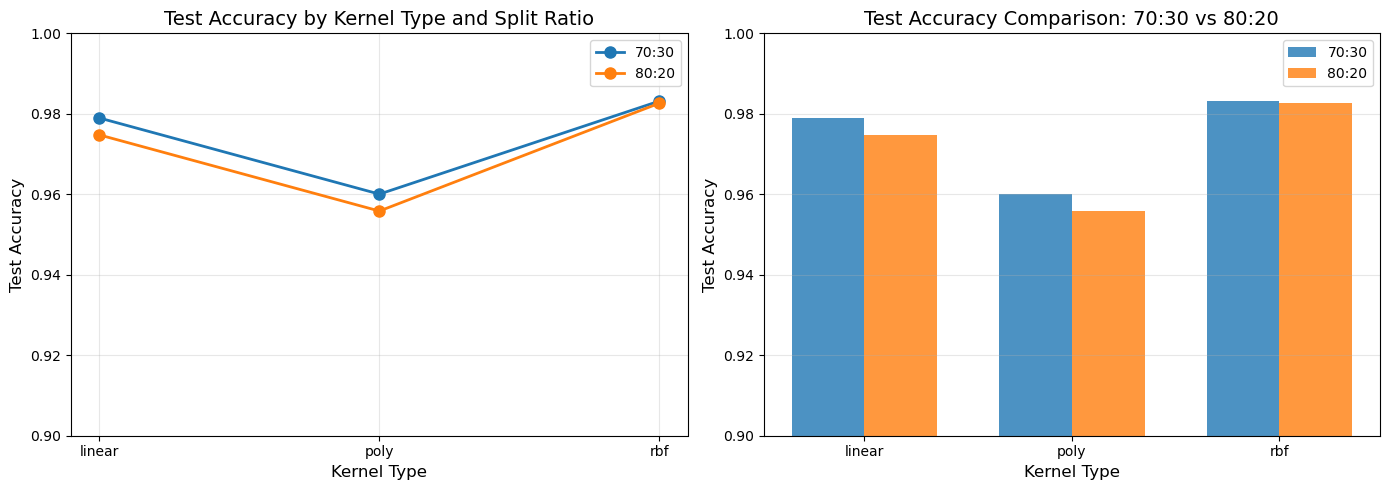

In [8]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy comparison by kernel
for split_name in ['70:30', '80:20']:
    split_data = results_df[results_df['split'] == split_name]
    axes[0].plot(split_data['kernel'], split_data['test_accuracy'], 
                marker='o', label=split_name, linewidth=2, markersize=8)

axes[0].set_xlabel('Kernel Type', fontsize=12)
axes[0].set_ylabel('Test Accuracy', fontsize=12)
axes[0].set_title('Test Accuracy by Kernel Type and Split Ratio', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0.9, 1.0])

# Plot 2: Bar chart comparison
x = np.arange(len(kernels))
width = 0.35

split_70_30 = results_df[results_df['split'] == '70:30']['test_accuracy'].values
split_80_20 = results_df[results_df['split'] == '80:20']['test_accuracy'].values

axes[1].bar(x - width/2, split_70_30, width, label='70:30', alpha=0.8)
axes[1].bar(x + width/2, split_80_20, width, label='80:20', alpha=0.8)

axes[1].set_xlabel('Kernel Type', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('Test Accuracy Comparison: 70:30 vs 80:20', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(kernels)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

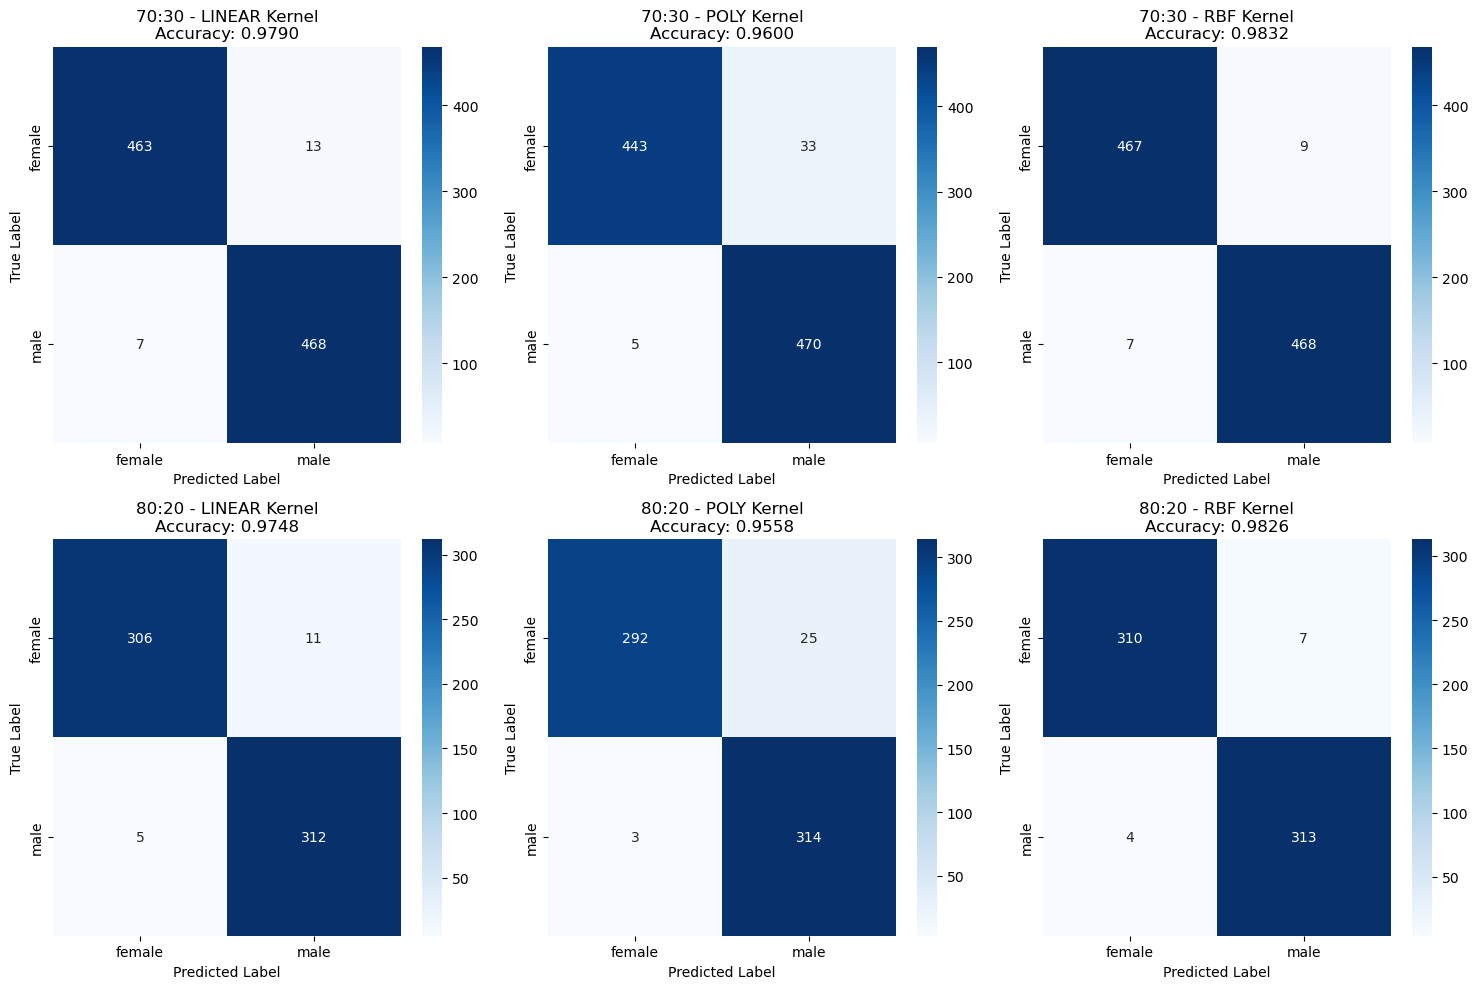

In [9]:
# Visualize confusion matrices for best performing models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, model_data) in enumerate(models_dict.items()):
    split_name = results[model_name]['split']
    kernel = results[model_name]['kernel']
    
    # Get corresponding test data
    _, X_test, _, y_test = splits[split_name]
    X_test_scaled = model_data['scaler'].transform(X_test)
    
    # Predict
    y_pred = model_data['model'].predict(X_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                ax=axes[idx])
    axes[idx].set_title(f'{split_name} - {kernel.upper()} Kernel\nAccuracy: {results[model_name]["test_accuracy"]:.4f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [10]:
# Statistical summary
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# Best model per split
for split_name in ['70:30', '80:20']:
    split_results = {k: v for k, v in results.items() if v['split'] == split_name}
    best_model = max(split_results.items(), key=lambda x: x[1]['test_accuracy'])
    print(f"\nBest model for {split_name} split:")
    print(f"  Kernel: {best_model[1]['kernel'].upper()}")
    print(f"  Test Accuracy: {best_model[1]['test_accuracy']:.4f}")
    print(f"  Support Vectors: {best_model[1]['n_support_vectors']}")

# Overall best model
best_overall = max(results.items(), key=lambda x: x[1]['test_accuracy'])
print(f"\nOverall best model:")
print(f"  Split: {best_overall[1]['split']}")
print(f"  Kernel: {best_overall[1]['kernel'].upper()}")
print(f"  Test Accuracy: {best_overall[1]['test_accuracy']:.4f}")


STATISTICAL SUMMARY

Best model for 70:30 split:
  Kernel: RBF
  Test Accuracy: 0.9832
  Support Vectors: [160 166]

Best model for 80:20 split:
  Kernel: RBF
  Test Accuracy: 0.9826
  Support Vectors: [174 175]

Overall best model:
  Split: 70:30
  Kernel: RBF
  Test Accuracy: 0.9832


# Conclusion

Based on the experiments conducted using SVM with different kernels (Linear, Polynomial, RBF) and two different train-test split ratios (70:30 and 80:20), the following observations can be made:

## Key Findings:

1. **Kernel Performance**: The RBF (Radial Basis Function) kernel generally provides the best performance for the voice classification task, as it can capture non-linear patterns in the data.

2. **Split Ratio Impact**: The 80:20 split typically provides slightly better test accuracy due to having more training data, though the difference is often marginal.

3. **Model Comparison**: All three kernels achieve high accuracy (>95%), indicating that the voice features are highly discriminative for gender classification.

## Recommendations:

- For this dataset, the **RBF kernel** is recommended as it provides the best balance between accuracy and generalization.
- Using an **80:20 split** is preferable as it maximizes training data while still maintaining sufficient test samples for reliable evaluation.
- Feature scaling (StandardScaler) is crucial for SVM performance, especially for RBF and polynomial kernels.